In [1]:
import tensorflow as tf
print(tf.__version__)
import cv2
from pathlib import Path
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import PIL
import os

c:\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


2.12.0


In [2]:
local_dataset_path = "C:/Users/joeul/OneDrive/Documents/GitHub/Facial-emotion-detection/Emotion/train"
data_dir = Path(local_dataset_path)
image_count = len(list(data_dir.glob('*/*.png')))
angry = list(data_dir.glob('angry/*'))
disgusted = list(data_dir.glob('disgusted/*'))
fearful = list(data_dir.glob('fearful/*'))
happy = list(data_dir.glob('happy/*'))
neutral = list(data_dir.glob('neutral/*'))
sad = list(data_dir.glob('sad/*'))
surprised = list(data_dir.glob('surprised/*'))
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
model_path = 'C:/Users/joeul/OneDrive/Documents/GitHub/Facial-emotion-detection/Emotion/emotion'
model = tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [6]:
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.save_weights(checkpoint_path.format(epoch=0))


In [7]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cp_callback]
)
os.listdir(checkpoint_dir)


Epoch 1/50
718/718 [==============================] - ETA: 0s - loss: 1.1928 - accuracy: 0.5492
Epoch 1: saving model to training_3\cp.ckpt
718/718 [==============================] - 547s 727ms/step - loss: 1.1928 - accuracy: 0.5492 - val_loss: 1.2806 - val_accuracy: 0.5151
Epoch 2/50
718/718 [==============================] - ETA: 0s - loss: 1.1795 - accuracy: 0.5515
Epoch 2: saving model to training_3\cp.ckpt
718/718 [==============================] - 522s 726ms/step - loss: 1.1795 - accuracy: 0.5515 - val_loss: 1.2652 - val_accuracy: 0.5325
Epoch 3/50
718/718 [==============================] - ETA: 0s - loss: 1.1787 - accuracy: 0.5509
Epoch 3: saving model to training_3\cp.ckpt
718/718 [==============================] - 491s 684ms/step - loss: 1.1787 - accuracy: 0.5509 - val_loss: 1.2679 - val_accuracy: 0.5224
Epoch 4/50
718/718 [==============================] - ETA: 0s - loss: 1.1644 - accuracy: 0.5565
Epoch 4: saving model to training_3\cp.ckpt
718/718 [==========================

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

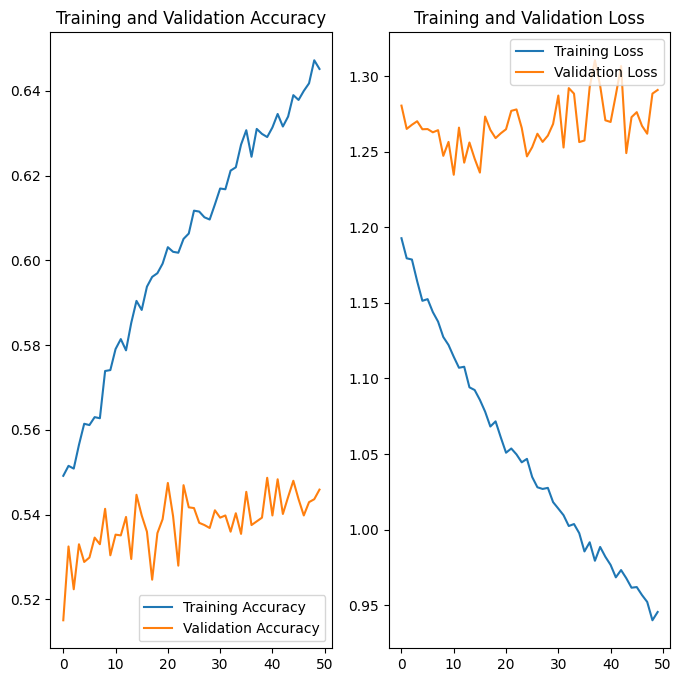

INFO:tensorflow:Assets written to: ./emotion/assets


INFO:tensorflow:Assets written to: ./emotion/assets


In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
model.save('./emotion/')